**Homeworks – Statistical learning, 2021/22. semester I.**

*Week 3*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
#----------------
import statsmodels.datasets as sm_datasets
auto = sm_datasets.get_rdataset('Auto', 'ISLR')
print(auto.__doc__)
auto = auto.data
auto
#----------------

.. container::

   ==== ===============
   Auto R Documentation
   ==== ===============

   .. rubric:: Auto Data Set
      :name: auto-data-set

   .. rubric:: Description
      :name: description

   Gas mileage, horsepower, and other information for 392 vehicles.

   .. rubric:: Usage
      :name: usage

   ::

      Auto

   .. rubric:: Format
      :name: format

   A data frame with 392 observations on the following 9 variables.

   ``mpg``
      miles per gallon

   ``cylinders``
      Number of cylinders between 4 and 8

   ``displacement``
      Engine displacement (cu. inches)

   ``horsepower``
      Engine horsepower

   ``weight``
      Vehicle weight (lbs.)

   ``acceleration``
      Time to accelerate from 0 to 60 mph (sec.)

   ``year``
      Model year (modulo 100)

   ``origin``
      Origin of car (1. American, 2. European, 3. Japanese)

   ``name``
      Vehicle name

   The orginal data contained 408 observations but 16 observations with
   missing values were remo

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [4]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# Exercise a)

## Problem

![img/ex_a.png](img/ex_a.png)

## Solution

In [5]:
print(f'The median "mpg" is {auto["mpg"].median():.2f}.')
auto['mpg01'] = (auto['mpg'] > auto['mpg'].median()).astype(int)
auto

The median "mpg" is 22.75.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


# Exercise b)

## Problem

![img/ex_b.png](img/ex_b.png)

## Solution

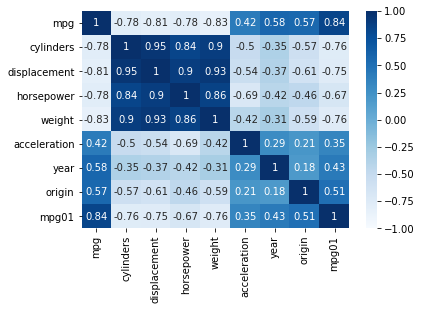

In [6]:
sns.heatmap(auto.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

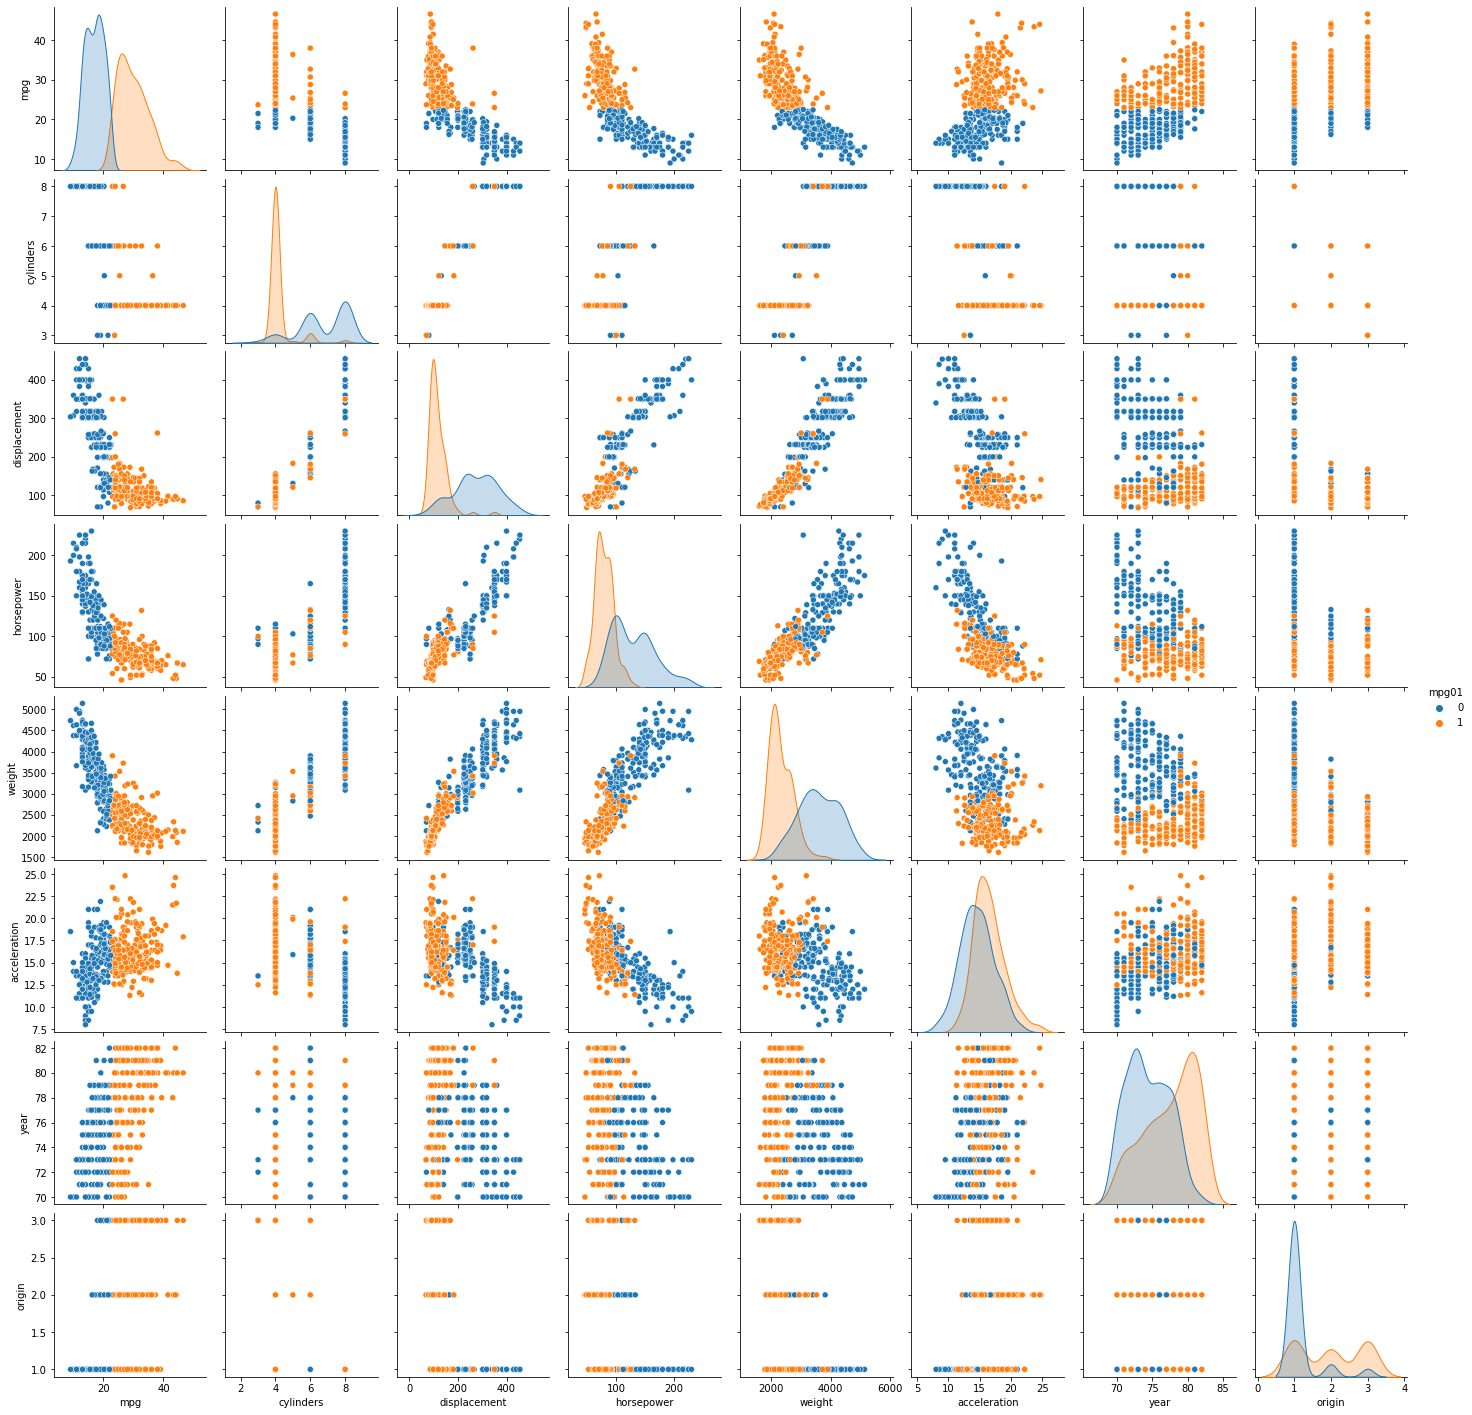

In [7]:
sns.pairplot(auto, hue='mpg01')
plt.show()

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


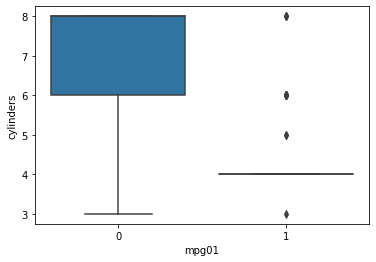

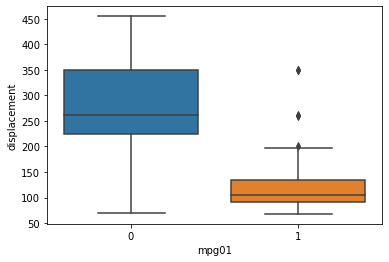

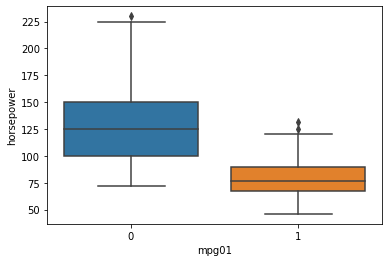

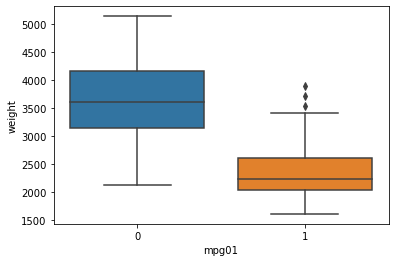

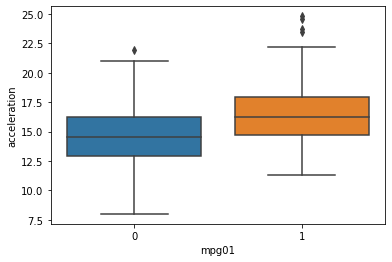

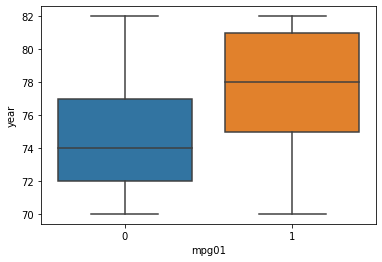

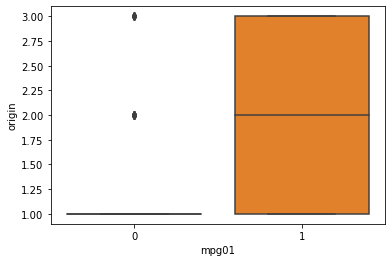

In [8]:
numeric_cols = list(auto.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
numeric_cols.remove('mpg')
numeric_cols.remove('mpg01')
print(numeric_cols)
for col in numeric_cols:
    plt.show(sns.boxplot(y=col, x='mpg01', data=auto))

Based on the plots the following features seems to be useful to predict `mpg01`: `cylinders`, `weight`, `displacement`, `horsepower`.

# Exercise c)

## Problem

![img/ex_c.png](img/ex_c.png)

## Solution

In [9]:
train_df, test_df = train_test_split(auto, test_size=0.2, shuffle=True, random_state=1)

# Exercise d)

## Problem

![img/ex_d.png](img/ex_d.png)

## Solution

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [11]:
#formula = 'mpg01 ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
#formula = 'mpg01 ~ cylinders + weight + displacement + horsepower'
formula = 'mpg01 ~ weight + displacement + horsepower'
model = smf.glm(formula = formula, data=train_df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  313
Model:                            GLM   Df Residuals:                      309
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91.291
Date:                Thu, 25 Nov 2021   Deviance:                       182.58
Time:                        16:15:27   Pearson chi2:                     409.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.1638      1.607      6.326   

accuracy: 0.8817891373801917
--------------------------------------------------
              precision    recall  f1-score   support

           0      0.901     0.848     0.874       151
           1      0.865     0.914     0.889       162

    accuracy                          0.882       313
   macro avg      0.883     0.881     0.881       313
weighted avg      0.883     0.882     0.882       313

--------------------------------------------------


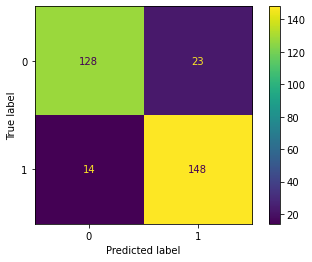

In [12]:
predictions = result.predict()
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print('accuracy:', accuracy_score(y_pred=predictions_nominal, y_true=train_df['mpg01']))
print('-'*50)
print(classification_report(train_df['mpg01'], predictions_nominal, digits = 3))
print('-'*50)
ConfusionMatrixDisplay.from_predictions(y_pred=predictions_nominal, y_true=train_df['mpg01'])
plt.show()

accuracy: 0.9367088607594937
--------------------------------------------------
              precision    recall  f1-score   support

           0      0.955     0.933     0.944        45
           1      0.914     0.941     0.928        34

    accuracy                          0.937        79
   macro avg      0.934     0.937     0.936        79
weighted avg      0.937     0.937     0.937        79

--------------------------------------------------


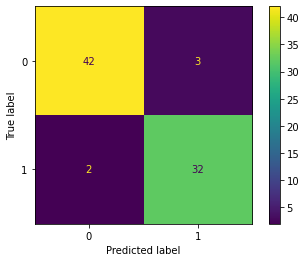

In [13]:
predictions = result.predict(test_df.drop(columns='mpg01'))
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print('accuracy:', accuracy_score(y_pred=predictions_nominal, y_true=test_df['mpg01']))
print('-'*50)
print(classification_report(test_df['mpg01'], predictions_nominal, digits = 3))
print('-'*50)
ConfusionMatrixDisplay.from_predictions(y_pred=predictions_nominal, y_true=test_df['mpg01'])
plt.show()